# Load CSV data

loan_data_test.csv

In [37]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
WorkSpaceName = 'StepUpWithTarget'
data = pd.read_csv("Distribution with Step Up with Target.csv") 
# Preview the first 5 lines of the loaded data 
print(data.shape)
print(data.columns)
data.head()

(992081, 46)
Index(['Bil.no', 'ID', 'I', 'D', 'FacilityType', 'FI', 'FAC No.',
       'CollateralValue', 'RestructureLoan', 'PaymentVia', 'Tenure',
       'CurrentInstallment', 'Interest', 'PrincipleAmount',
       'PtgWaiverPrinciple', 'WaiverOnPrinciple', 'PrincipleAfterWaiver',
       'IIS', 'ProposedInterestRate', 'WaiverOnIIS', 'IISAfterWaiver',
       'PenaltyInterest', 'PtgWaiverPenaltyInterest',
       'WaiverOnPenaltyIntAmount', 'PenaltyIntAfterWaiver', 'OtherChargers',
       'PtgWaiverOtherCharges', 'WaiverOnOthCharges', 'OtherChrgesAfterWaiver',
       'TotalOSBeforeWaiver', 'TotalOSAfterWaiver', 'Target',
       'TenureAfterWaiver', 'CrdtStatus', 'InstlmentAfterWaiver',
       'ProposedInstallment', 'StepUp', 'StepUpAMount', 'RepaymentAmount',
       'StepUpStartDate', 'StepUpEndDate', 'matrix', 'Column1', 'Column2',
       'Column3', 'Column4'],
      dtype='object')


,Bil.no,ID,I,D,FacilityType,FI,FAC No.,CollateralValue,RestructureLoan,PaymentVia,...,StepUp,StepUpAMount,RepaymentAmount,StepUpStartDate,StepUpEndDate,matrix,Column1,Column2,Column3,Column4
0,1,H2,H,2,Credit Cards,FI10,FAC1,0.0,Yes,AKPK,...,NaN,NaN,NaN,NaN,NaN,Matrix 1,0.0,NaN,NaN,NaN
1,2,H2,H,2,Credit Cards,FI10,FAC2,0.0,Yes,AKPK,...,NaN,NaN,NaN,NaN,NaN,Matrix 1,0.0,NaN,NaN,NaN
2,3,H2,H,2,Credit Cards,FI27,FAC3,0.0,Yes,AKPK,...,NaN,NaN,NaN,NaN,NaN,Matrix 1,0.0,NaN,NaN,NaN
3,4,H2,H,2,Credit Cards,FI27,FAC4,0.0,Yes,AKPK,...,NaN,NaN,NaN,NaN,NaN,Matrix 1,0.0,NaN,NaN,NaN
4,5,H2,H,2,Credit Cards,FI33,FAC5,0.0,Yes,AKPK,...,NaN,NaN,NaN,NaN,NaN,Matrix 1,0.0,NaN,NaN,NaN


In [39]:
#droppng of irrelevant columns and rows with missing values
columns_to_drop = ['Bil.no','StepUp','StepUpAMount']
data.drop(columns=columns_to_drop, inplace=True, axis=1)


In [40]:
#dropping all missing values
data.dropna(inplace=True)
print(data.shape)
data.head()

(7497, 43)


,ID,I,D,FacilityType,FI,FAC No.,CollateralValue,RestructureLoan,PaymentVia,Tenure,...,InstlmentAfterWaiver,ProposedInstallment,RepaymentAmount,StepUpStartDate,StepUpEndDate,matrix,Column1,Column2,Column3,Column4
16,H11,H,11,Term Loan (Secured),FI17,FAC17,0.0,Yes,SELF,120.0,...,720.0,720.0,720.0,2016-11-30,2018-10-31,Matrix 2,720.0,850.0,1110.0,1110.0
19,H16,H,16,Islamic Car Financing,FI41,FAC20,0.0,Yes,SELF,0.0,...,457.0,457.0,457.0,2018-01-31,2019-12-31,Matrix 2,457.0,457.0,457.0,457.0
20,H16,H,16,Personal Loan,FI17,FAC21,0.0,Yes,SELF,0.0,...,400.0,400.0,400.0,2018-01-31,2019-12-31,Matrix 2,400.0,400.0,400.0,400.0
42,H36,H,36,Housing Loan,FI25,FAC43,0.0,Yes,SELF,420.0,...,3650.0,3650.0,3650.0,2017-11-30,2019-10-31,Matrix 2,3650.0,4300.0,5150.0,5150.0
1098,H425,H,425,Term Loan Financing,FI45,FAC1099,0.0,Yes,SELF,120.0,...,200.0,200.0,200.0,2016-09-30,2018-08-31,Matrix 2,200.0,200.0,200.0,200.0


# View Imbalance Data

Minor Blacklist       1927
 Level 1 Bankrupt     1865
Moderate Blacklist    1263
Level 2 Bankrupt      1022
Priority Blacklist     726
Level 3 Bankrupt       616
Level 4 Bankrupt        78
Name: Target, dtype: int64

Show Classes and Percentage
 Level 1 Bankrupt 
 0.25 %

Level 3 Bankrupt 
 0.08 %

Moderate Blacklist 
 0.17 %

Priority Blacklist 
 0.1 %

Level 2 Bankrupt 
 0.14 %

Minor Blacklist 
 0.26 %

Level 4 Bankrupt 
 0.01 %



<AxesSubplot:>

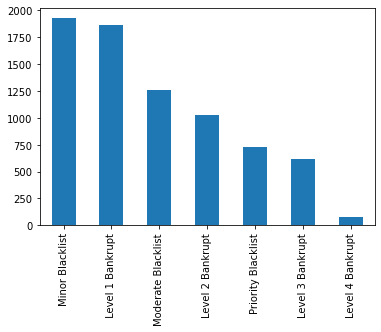

In [41]:
targetCol = 'Target'

print(data[targetCol].value_counts())
total = data[targetCol].count()

print('\nShow Classes and Percentage')
for f in  data[targetCol].unique():
    print(f, '\n', round(data[targetCol].value_counts()[f]/total,2), '%\n' )

#Bins = How many 
data[targetCol].value_counts().plot(kind='bar')

# Draw Correlation Matrix

In [42]:
import pandas as pd
import numpy as np
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,D,CollateralValue,Tenure,CurrentInstallment,Interest,PrincipleAmount,PtgWaiverPrinciple,WaiverOnPrinciple,PrincipleAfterWaiver,IIS,ProposedInterestRate,WaiverOnIIS,IISAfterWaiver,PenaltyInterest,PtgWaiverPenaltyInterest,WaiverOnPenaltyIntAmount,PenaltyIntAfterWaiver,OtherChargers,PtgWaiverOtherCharges,WaiverOnOthCharges,OtherChrgesAfterWaiver,TotalOSBeforeWaiver,TotalOSAfterWaiver,TenureAfterWaiver,InstlmentAfterWaiver,ProposedInstallment,RepaymentAmount,Column1,Column2,Column3,Column4
D,1.00,-0.01,0.21,-0.01,-0.02,0.06,-0.01,-0.00,0.06,0.00,-0.31,-0.00,0.01,0.01,-0.03,-0.01,0.01,0.02,-0.02,0.01,0.01,0.06,0.06,0.17,0.02,0.02,0.02,0.02,0.01,0.01,-0.01
CollateralValue,-0.01,1.00,0.13,0.05,-0.00,0.22,-0.00,-0.00,0.22,0.03,-0.02,0.01,0.03,0.01,-0.04,-0.01,0.02,0.00,0.00,-0.00,0.00,0.21,0.21,0.10,0.27,0.27,0.27,0.27,0.23,0.22,0.17
Tenure,0.21,0.13,1.00,0.05,-0.02,0.44,0.02,0.03,0.44,0.17,-0.42,0.10,0.15,0.09,-0.18,0.02,0.09,0.11,0.06,0.04,0.11,0.47,0.46,0.59,0.40,0.40,0.40,0.40,0.37,0.37,0.30
CurrentInstallment,-0.01,0.05,0.05,1.00,-0.00,0.16,-0.00,0.03,0.16,0.02,-0.05,0.01,0.02,0.01,-0.00,0.01,0.01,0.02,-0.01,-0.00,0.03,0.15,0.15,0.05,0.17,0.17,0.17,0.17,0.17,0.18,0.16
Interest,-0.02,-0.00,-0.02,-0.00,1.00,-0.01,-0.00,-0.00,-0.01,0.00,0.02,0.00,-0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00
PrincipleAmount,0.06,0.22,0.44,0.16,-0.01,1.00,0.02,0.06,1.00,0.14,-0.22,0.06,0.13,0.05,-0.13,-0.01,0.05,0.06,0.00,0.01,0.06,0.97,0.98,0.49,0.90,0.90,0.90,0.90,0.87,0.89,0.73
PtgWaiverPrinciple,-0.01,-0.00,0.02,-0.00,-0.00,0.02,1.00,0.54,-0.01,0.02,-0.06,0.04,-0.00,-0.00,0.02,-0.01,0.00,0.02,0.00,-0.00,0.02,0.03,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00
WaiverOnPrinciple,-0.00,-0.00,0.03,0.03,-0.00,0.06,0.54,1.00,0.01,0.02,-0.07,0.04,-0.01,-0.00,0.05,-0.00,-0.00,0.02,0.04,0.01,0.02,0.07,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
PrincipleAfterWaiver,0.06,0.22,0.44,0.16,-0.01,1.00,-0.01,0.01,1.00,0.14,-0.22,0.06,0.13,0.05,-0.13,-0.01,0.05,0.06,-0.00,0.01,0.06,0.97,0.98,0.50,0.90,0.90,0.90,0.90,0.87,0.89,0.73
IIS,0.00,0.03,0.17,0.02,0.00,0.14,0.02,0.02,0.14,1.00,-0.11,0.67,0.77,0.02,0.03,0.14,0.00,0.03,0.03,0.00,0.03,0.34,0.25,0.16,0.14,0.14,0.14,0.14,0.15,0.16,0.15


# Save Correlation Matrix to PNG

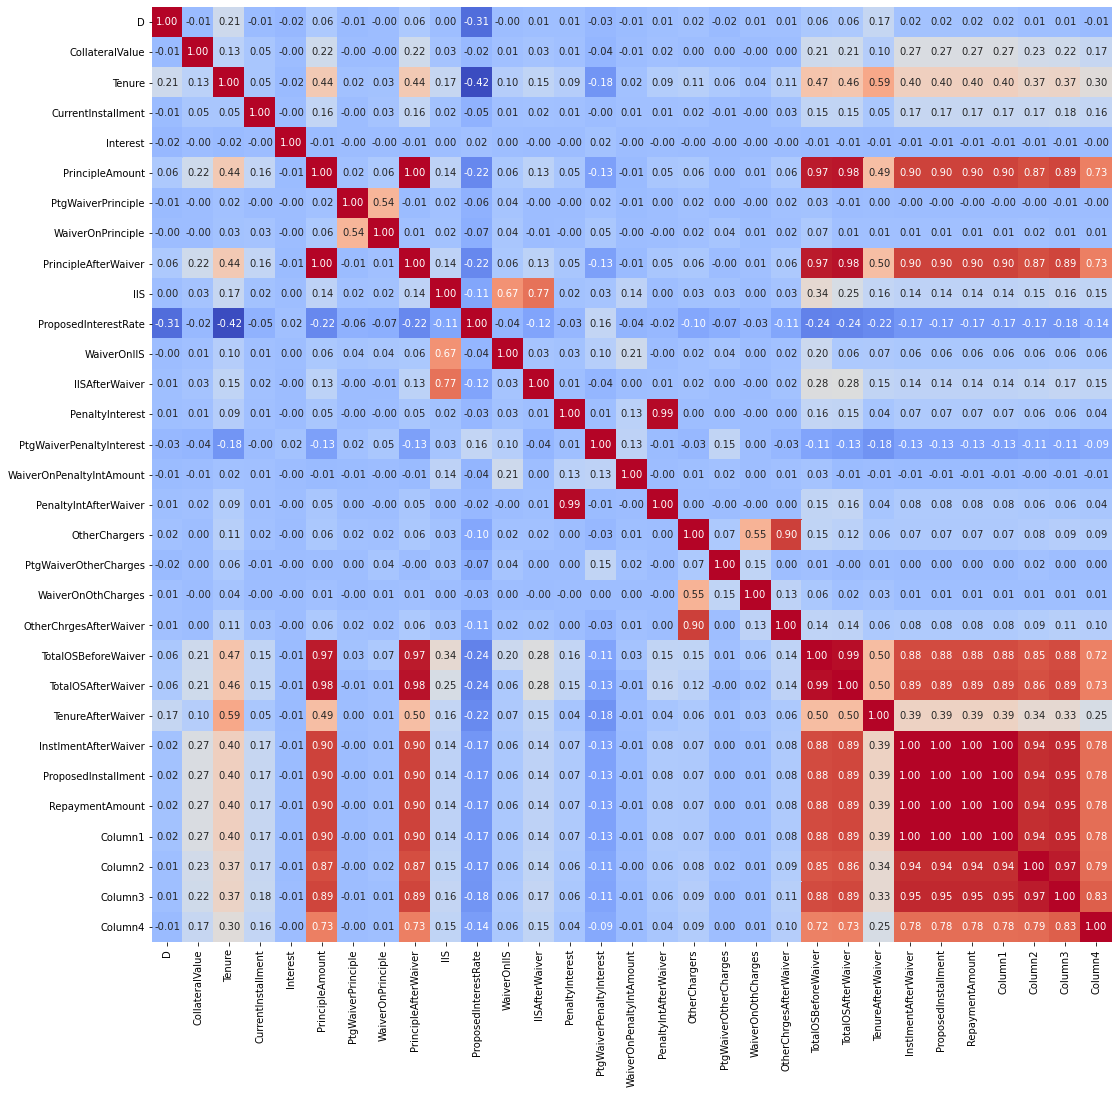

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = data.columns.shape[0]
imgsize = cols/2.5 # SET sIZING BASED ON COLUMNS AMOUNT
fig, ax = plt.subplots(sharex=True, figsize=(imgsize,imgsize))

# .2f is the precision of Correlation
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig(WorkSpaceName+'_Correlation_Matrix.png', bbox_inches='tight', pad_inches=0.0)

# How to get the Weight of Evidence (WOE) and Information Value

https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan



Credit risk models are mostly required to be interpretable and easy to understand. To achieve this all the independent variables will have to be categorical in nature. Since some variables are continuous we will employ the concept of Weight of Evidence.

Weight of evidence will help us transform continuous variables into categorical features. The continuous variable is split into bins and based on their WOE , new variables are created. Also, information value helps us to determine which feature is useful in prediction. The information value for the independent variables are indicted below. Variables with IV less than 0.02 will not be included in the model because they have no prediction power Siddiqi(2006).

![title](img/WOE.png)

As can be seen from the above figure, the correlation between variables is very small. The correlation coefficient between NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines is 0.43.
Next, I further calculate the Infomation Value (IV) for each variable. IV index is generally used to determine the predictive ability of independent variables. The formula is:
IV=sum((goodattribute-badattribute)*ln(goodattribute/badattribute))
The criteria for judging the predictive ability of variables through IV value are:
##### < 0.02: unpredictive
##### 0.02 to 0.1: weak
##### 0.1 to 0.3: medium
##### 0.3 to 0.5: strong
##### > 0.5: suspicious

In [49]:
df

,ID,I,D,FacilityType,FI,FAC No.,CollateralValue,RestructureLoan,PaymentVia,Tenure,...,InstlmentAfterWaiver,ProposedInstallment,RepaymentAmount,StepUpStartDate,StepUpEndDate,matrix,Column1,Column2,Column3,Column4
16,H11,H,11,Term Loan (Secured),FI17,FAC17,0.0,Yes,SELF,120.0,...,720.0,720.0,720.0,2016-11-30,2018-10-31,Matrix 2,720.0,850.0,1110.0,1110.0
19,H16,H,16,Islamic Car Financing,FI41,FAC20,0.0,Yes,SELF,0.0,...,457.0,457.0,457.0,2018-01-31,2019-12-31,Matrix 2,457.0,457.0,457.0,457.0
20,H16,H,16,Personal Loan,FI17,FAC21,0.0,Yes,SELF,0.0,...,400.0,400.0,400.0,2018-01-31,2019-12-31,Matrix 2,400.0,400.0,400.0,400.0
42,H36,H,36,Housing Loan,FI25,FAC43,0.0,Yes,SELF,420.0,...,3650.0,3650.0,3650.0,2017-11-30,2019-10-31,Matrix 2,3650.0,4300.0,5150.0,5150.0
1098,H425,H,425,Term Loan Financing,FI45,FAC1099,0.0,Yes,SELF,120.0,...,200.0,200.0,200.0,2016-09-30,2018-08-31,Matrix 2,200.0,200.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991617,H255640,H,255640,Personal Financing,FI16,FAC991618,0.0,Yes,SELF,0.0,...,350.0,350.0,350.0,2018-12-31,2020-11-30,Matrix 2,350.0,1100.0,1100.0,1100.0
991764,H255695,H,255695,Personal Financing,FI17,FAC991765,0.0,Yes,SELF,120.0,...,1000.0,1000.0,1000.0,2018-05-31,2020-04-30,Matrix 2,1000.0,1100.0,1100.0,1100.0
991921,H255768,H,255768,Personal Financing,FI17,FAC991922,0.0,Yes,SELF,120.0,...,1000.0,1000.0,1000.0,2018-05-31,2020-04-30,Matrix 2,1000.0,1250.0,1450.0,1450.0
991935,H255776,H,255776,Personal Loan,FI16,FAC991936,0.0,Yes,SELF,120.0,...,1400.0,1400.0,1400.0,2019-02-28,2021-01-31,Matrix 2,1400.0,1500.0,1600.0,1850.0


In [51]:

df = data

column = 'InstlmentAfterWaiver'
feature,target = column, 'Target'

print(data[column])
df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

df_woe_iv

16          720.0
19          457.0
20          400.0
42         3650.0
1098        200.0
           ...   
991617      350.0
991764     1000.0
991921     1000.0
991935     1400.0
992077    10000.0
Name: InstlmentAfterWaiver, Length: 7497, dtype: float64


KeyError: 1

In [220]:
from sklearn.ensemble import ExtraTreesClassifier
np.set_printoptions(precision=5)

X = data[['term','loan_amnt','int_rate']]
Y = data['good_bad'] #Target
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(X.columns.values)
print(model.feature_importances_)

FeatureImportance = pd.DataFrame({'Feature':X.columns.values, 'Importance':model.feature_importances_})

print(FeatureImportance)

#Filter Most Important Feateure 0.3 Minimum
MOST_IMPORTANT = FeatureImportance[FeatureImportance['Importance'] > 0.1]
print('\nMOST_IMPORTANT Features')
print(MOST_IMPORTANT['Feature'].values)

NOT_IMPORTANT = FeatureImportance[FeatureImportance['Importance'] < 0.1]
print('\nNOT_IMPORTANT Features')
print(NOT_IMPORTANT['Feature'].values)

['term' 'loan_amnt' 'int_rate']
[0.00787 0.60209 0.39004]
     Feature  Importance
0       term    0.007870
1  loan_amnt    0.602088
2   int_rate    0.390042

MOST_IMPORTANT Features
['loan_amnt' 'int_rate']

NOT_IMPORTANT Features
['term']
